Validation MSE:24721208.4817


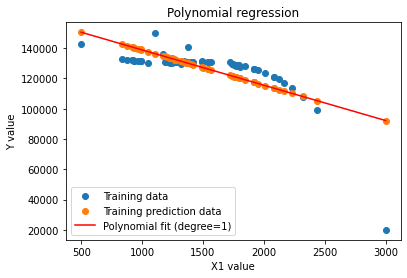

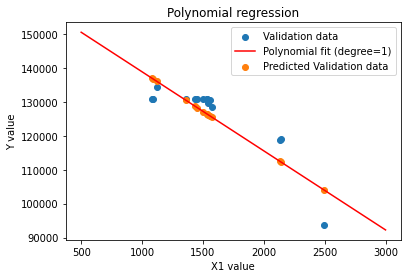

Validation MSE:640129.7744


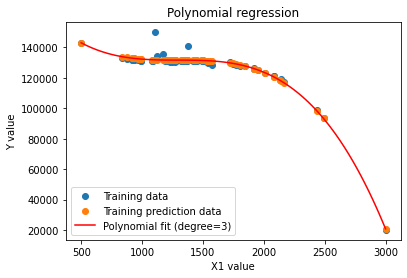

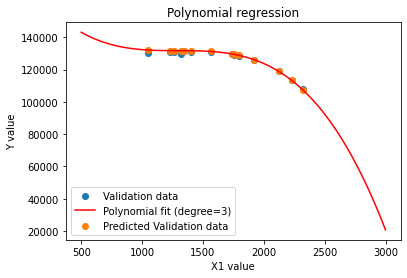

Validation MSE:3831623.0289


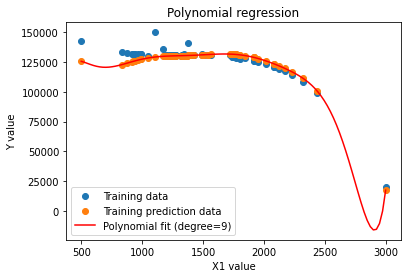

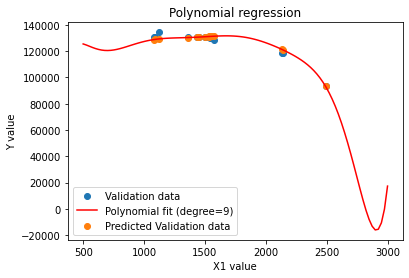

Validation MSE:3172657.8077


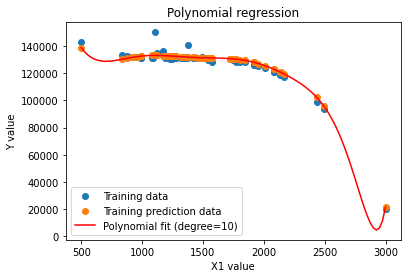

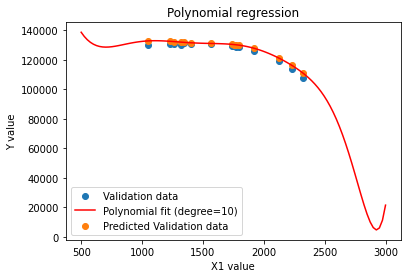

Validation MSE:627231728.9557


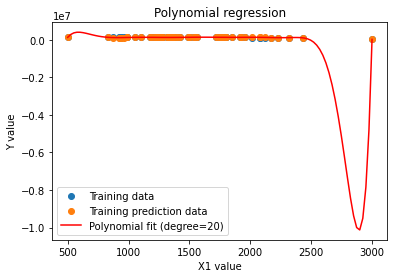

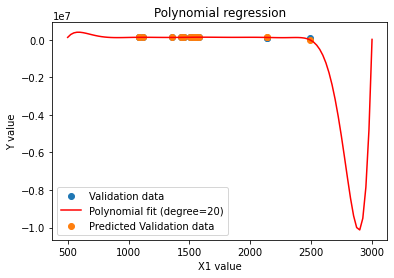

Validation MSE:16470888365683.0391


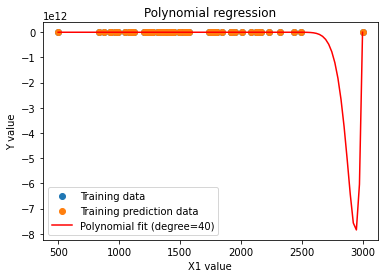

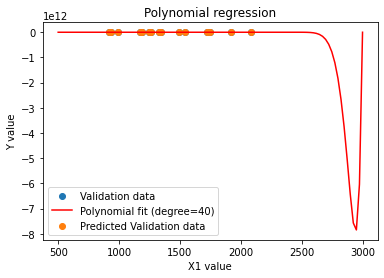

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def polyregression(degree, n_folds=5):
    #Load data
    train_data=np.genfromtxt('train35_dataset1.csv', delimiter=',')
    test_data=np.genfromtxt('test35_dataset1.csv', delimiter=',')
    #Split into features and target , note : dropping 2nd column as discussed in class
    X, y=train_data[:,0],train_data[:,2]
    #Perform k-fold cross validation
    fold_size =len(X)//n_folds
    mse_val=[]
    for i in range(n_folds):
        #Split data into train and validation sets
        X_val=X[i*fold_size:(i+1)*fold_size]
        X_train=np.concatenate((X[:i*fold_size],X[(i+1)*fold_size:]))
        y_val=y[i*fold_size:(i+1)*fold_size]
        y_train=np.concatenate((y[:i*fold_size],  y[(i+1)*fold_size:]))
        #Create polynomial features empty one
        X_train_poly=np.column_stack((np.ones(X_train.shape[0]), X_train))
        X_val_poly=np.column_stack((np.ones(X_val.shape[0]), X_val))
        for d in range(2, degree+1):
            X_train_poly=np.column_stack((X_train_poly, X_train**d))
            X_val_poly=np.column_stack((X_val_poly, X_val**d))
        #Fit linear regression model
        beta=np.linalg.inv(X_train_poly.T@X_train_poly) 
        #print(beta)
        beta=beta@X_train_poly.T@y_train
        #Compute predictions on validation set
        y_val_pred=X_val_poly@beta
        #Compute validation error
        mse_val.append(np.mean((y_val_pred -y_val)**2))
        #beta_values.append(list(beta))

    #Choose the split corresponding toh lowest validation error
    best_fold = np.argmin(mse_val)
    X_val=X[best_fold*fold_size:(best_fold+1)*fold_size]
    X_train =np.concatenate((X[:best_fold*fold_size],X[(best_fold+1)*fold_size:]))
    y_val =y[best_fold*fold_size:(best_fold+1)*fold_size]
    y_train=np.concatenate((y[:best_fold*fold_size], y[(best_fold+1)*fold_size:]))
    #Create polynomial features using the best fold split
    X_val_poly=np.column_stack((np.ones(X_val.shape[0]), X_val))
    X_train_poly=np.column_stack((np.ones(X_train.shape[0]), X_train))
    for d in range(2,degree+1):
        X_train_poly=np.column_stack((X_train_poly,X_train**d))
        X_val_poly=np.column_stack((X_val_poly, X_val**d))

    #Fit linear regression  closed form
    beta=np.linalg.inv(X_train_poly.T@X_train_poly)@X_train_poly.T@y_train
    #Compute predictions on validation and test sets
    y_val_pred=X_val_poly@beta
    y_train_pred=X_train_poly@beta
    #Define range of x values
    x_range=np.linspace(min(train_data[:, 0]),max(train_data[:, 0]),100)
    y_pred= np.zeros_like(x_range)
    for d in range(len(beta)):
      y_pred+=beta[d]*x_range**d  
    #Compute MSE on validation set
    mse_val= np.mean((y_val_pred-y_val)**2)
    print(f'Validation MSE:{mse_val:.4f}')
    #Plot training data which was given 
    plt.scatter(X_train,y_train,label='Training data')
    plt.scatter(X_train,y_train_pred,label='Training prediction data')
    plt.xlabel("X1 value")
    plt.ylabel("Y value")
    plt.plot(x_range,y_pred,color='red',label=f'Polynomial fit (degree={degree})')
    plt.legend()
    plt.title('Polynomial regression')
    plt.show()
    #Plot validation sample
    plt.scatter(X_val,y_val,label='Validation data')
    plt.plot(x_range,y_pred,color='red',label=f'Polynomial fit (degree={degree})')
    plt.scatter(X_val,y_val_pred,label='Predicted Validation data')
    plt.xlabel("X1 value")
    plt.ylabel("Y value")
    plt.legend()
    plt.title('Polynomial regression')
    plt.show()

for degree in (1,3,9,10,20,40):
  polyregression(degree)

[120133321.92640904, 37470005.41130765, 7479342.843100697, 7382772.050732415, 7361557.372634519, 7078845.183579905, 6929637.719270328, 6899374.622164001, 22255992.92610777, 8271434.499211511, 123392913.88631213, 516530075.6544146, 67459928.21291181, 233312423.68991318, 457738975.2015847, 1306054483.8470001, 193437393.76087046, 348103632.3466675, 2350470807.778142, 49641769.94216335, 491930269.7407687, 228559033204.21442, 15123026745.03372, 24855130857.164295, 159107890093.66232, 66585108170.213066, 241902803517.6679, 92428557188.92694, 41935737715.11061, 39436913959.123985, 2396025107044.8574, 5482036781738.601, 1978121229794.4785, 784090183262.5797, 23682771183735.215, 3007889997177.2896, 36307965198198.7, 14060747186506.27, 766390239314.7675, 26057863292250.984, 89740982389153.5, 40776205151864.5, 140729456226201.88, 7789684814865813.0]
[24721208.481739767, 10743574.078480469, 640129.7743926719, 647709.5986294628, 719688.7869610429, 1158670.5729507208, 1182863.9246572333, 1186232.901

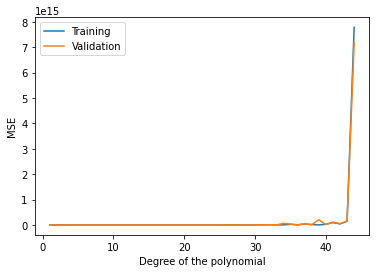

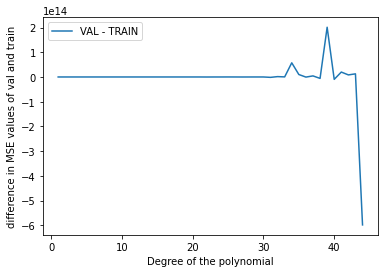

In [7]:
import numpy as np
import matplotlib.pyplot as plt
def mse_calc(degree, n_folds=5):
  #Load data
  train_data=np.genfromtxt('train35_dataset1.csv',delimiter=',')
  test_data=np.genfromtxt('test35_dataset1.csv',delimiter=',')
  X,y=train_data[:,0],train_data[:,2]
  #Perform k-fold cross validation
  fold_size=len(X)//n_folds
  mse_val=[]
  for i in range(n_folds):
      #Split data into train and validation sets
      X_val= X[i*fold_size:(i+1)*fold_size]
      y_val= y[i*fold_size:(i+1)*fold_size]
      X_train =np.concatenate((X[:i*fold_size],X[(i+1)*fold_size:]))
      y_train =np.concatenate((y[:i*fold_size],y[(i+1)*fold_size:]))
      #Create polynomial features
      X_train_poly =np.column_stack((np.ones(X_train.shape[0]),X_train))
      X_val_poly =np.column_stack((np.ones(X_val.shape[0]),X_val))
      for d in range(2, degree+1):
          X_train_poly =np.column_stack((X_train_poly,X_train**d))
          X_val_poly =np.column_stack((X_val_poly,X_val**d))
      #Fit linear regression model closed form
      beta=np.linalg.inv(X_train_poly.T@X_train_poly)@X_train_poly.T@y_train
      #Compute predictions on validation set
      y_val_pred=X_val_poly@beta
      #Compute validation error
      mse_val.append(np.mean((y_val_pred - y_val)**2))
      #beta_values.append(list(beta))

  #Choose beta with lowest validation error
  best_fold = np.argmin(mse_val)
  X_val = X[best_fold*fold_size:(best_fold+1)*fold_size]
  y_val = y[best_fold*fold_size:(best_fold+1)*fold_size]
  X_train = np.concatenate((X[:best_fold*fold_size], X[(best_fold+1)*fold_size:]))
  y_train = np.concatenate((y[:best_fold*fold_size], y[(best_fold+1)*fold_size:]))

  #Create polynomial features using all training data
  X_train_poly = np.column_stack((np.ones(X_train.shape[0]), X_train))
  X_val_poly = np.column_stack((np.ones(X_val.shape[0]), X_val))
  for d in range(2, degree+1):
      X_train_poly = np.column_stack((X_train_poly, X_train**d))
      X_val_poly = np.column_stack((X_val_poly, X_val**d))

  #Fit linear regression model using all training data
  beta=np.linalg.inv(X_train_poly.T@X_train_poly)@X_train_poly.T@y_train

  #Compute predictions on validation and test sets
  y_val_pred=X_val_poly @ beta
  y_train_pred=X_train_poly @ beta
  #Compute validation error
  mse_values=(np.mean((y_val_pred-y_val)**2))
  mse_train=(np.mean((y_train_pred-y_train)**2))
  return mse_train,mse_values
mse_train=[]
mse_val=[]
degrees=[]
min_mse_Degree=0
min_mse_train,min_mse_val=mse_calc(1)
for degree in range(1,45):
  a,b=mse_calc(degree)
  if b<min_mse_val:
    min_mse_val=b
    min_mse_Degree=degree
  mse_train.append(a)
  mse_val.append(b)
  degrees.append(degree)
print(mse_train)
print(mse_val)
print('mse for training data:',mse_train[min_mse_Degree-1],"corresponding degree:",min_mse_Degree)
print('min mse for validation data:',min_mse_val,"corresponding degree:",min_mse_Degree)
plt.plot(degrees,mse_train,label='Training')
plt.plot(degrees,mse_val,label='Validation')
plt.legend()
plt.xlabel('Degree of the polynomial')
plt.ylabel("MSE")
plt.show()
plt.plot(degrees,np.subtract(mse_val,mse_train),label='VAL - TRAIN')
plt.legend()
plt.xlabel('Degree of the polynomial')
plt.ylabel("difference in MSE values of val and train")
plt.show()

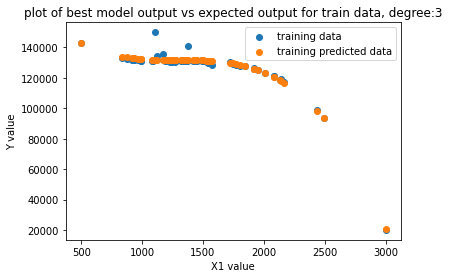

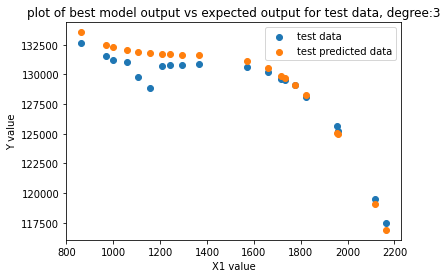

error for the best model using Mean Square Error(MSE) for test data : 1052853.2890679438
error for the best model using Mean Square Error(MSE) for train data : 7479342.843100697


In [8]:
import numpy as np
import matplotlib.pyplot as plt
n_folds = 5
degree = 3
#Load data
train_data = np.genfromtxt('train35_dataset1.csv', delimiter=',')
test_data = np.genfromtxt('test35_dataset1.csv', delimiter=',')

#Split into features and target
X, y = train_data[:, 0], train_data[:, 2]
X_test, y_test = test_data[:, 0], test_data[:, 2]

#Perform k-fold cross validation
fold_size = len(X) // n_folds
mse_val = []
for i in range(n_folds):
    #Split data into train and validation sets
    X_val = X[i*fold_size:(i+1)*fold_size]
    y_val = y[i*fold_size:(i+1)*fold_size]
    X_train = np.concatenate((X[:i*fold_size], X[(i+1)*fold_size:]))
    y_train = np.concatenate((y[:i*fold_size], y[(i+1)*fold_size:]))

    #Create polynomial features
    X_train_poly = np.column_stack((np.ones(X_train.shape[0]), X_train))
    X_val_poly = np.column_stack((np.ones(X_val.shape[0]), X_val))
    for d in range(2, degree+1):
        X_train_poly = np.column_stack((X_train_poly, X_train**d))
        X_val_poly = np.column_stack((X_val_poly, X_val**d))

    #Fit linear regression model
    beta=np.linalg.inv(X_train_poly.T@X_train_poly)@X_train_poly.T@y_train
    #Compute predictions on validation set
    y_val_pred=X_val_poly@beta

    #Compute validation error
    mse_val.append(np.mean((y_val_pred-y_val)**2))
    #beta_values.append(list(beta))

#Choose beta with lowest validation error
bf=np.argmin(mse_val)
X_train=np.concatenate((X[:bf*fold_size],X[(bf+1)*fold_size:]))
y_train=np.concatenate((y[:bf*fold_size],y[(bf+1)*fold_size:]))
X_train_poly=np.column_stack((np.ones(X_train.shape[0]),X_train))
X_test_poly=np.column_stack((np.ones(X_test.shape[0]),X_test))
for d in range(2,degree+1):
    X_train_poly=np.column_stack((X_train_poly, X_train**d))
    X_test_poly=np.column_stack((X_test_poly, X_test**d))
#Fit linear regression model using all training data
beta=np.linalg.inv(X_train_poly.T@X_train_poly)@X_train_poly.T@y_train
#Compute predictions on validation and test sets
y_train_pred =X_train_poly@beta
y_test_pred =X_test_poly@beta
#Compute validation error
plt.scatter(X_train,y_train,label='training data')
plt.scatter(X_train,y_train_pred,label='training predicted data')
plt.legend()
plt.title(f'plot of best model output vs expected output for train data, degree:{degree}')
plt.xlabel("X1 value")
plt.ylabel("Y value")
plt.show()
plt.scatter(X_test,y_test,label='test data')
plt.scatter(X_test,y_test_pred,label='test predicted data')
plt.title(f'plot of best model output vs expected output for test data, degree:{degree}')
plt.legend()
plt.xlabel("X1 value")
plt.ylabel("Y value")
plt.show()
mse_test=(np.mean((y_test_pred-y_test)**2))
mse_train=(np.mean((y_train_pred-y_train)**2))
print("error for the best model using Mean Square Error(MSE) for test data :",mse_test)
print("error for the best model using Mean Square Error(MSE) for train data :",mse_train)

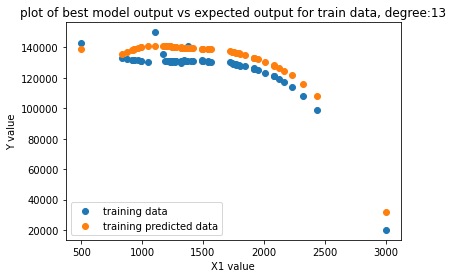

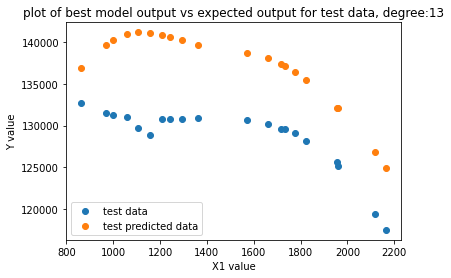

error for the best model using Mean Square Error(MSE) for test data : 72619267.2972907
error for the best model using Mean Square Error(MSE) for train data : 67459928.21291181


In [10]:
import numpy as np
import matplotlib.pyplot as plt
n_folds = 5
degree = 13
#Load data
train_data = np.genfromtxt('train35_dataset1.csv', delimiter=',')
test_data = np.genfromtxt('test35_dataset1.csv', delimiter=',')
#Split into features and target
X, y = train_data[:, 0], train_data[:, 2]
X_test, y_test = test_data[:, 0], test_data[:, 2]
#Perform k-fold cross validation
fold_size = len(X) // n_folds
mse_val = []
for i in range(n_folds):
    #Split data into train and validation sets
    X_val = X[i*fold_size:(i+1)*fold_size]
    y_val = y[i*fold_size:(i+1)*fold_size]
    X_train = np.concatenate((X[:i*fold_size], X[(i+1)*fold_size:]))
    y_train = np.concatenate((y[:i*fold_size], y[(i+1)*fold_size:]))
    #Create polynomial features
    X_train_poly = np.column_stack((np.ones(X_train.shape[0]), X_train))
    X_val_poly = np.column_stack((np.ones(X_val.shape[0]), X_val))
    for d in range(2, degree+1):
        X_train_poly = np.column_stack((X_train_poly, X_train**d))
        X_val_poly = np.column_stack((X_val_poly, X_val**d))
    #Fit linear regression model
    beta=np.linalg.inv(X_train_poly.T@X_train_poly)@X_train_poly.T@y_train
    #Compute predictions on validation set
    y_val_pred=X_val_poly@beta
    #Compute validation error
    mse_val.append(np.mean((y_val_pred-y_val)**2))
    #beta_values.append(list(beta))

#Choose beta with lowest validation error
bf=np.argmin(mse_val)
X_train=np.concatenate((X[:bf*fold_size],X[(bf+1)*fold_size:]))
y_train=np.concatenate((y[:bf*fold_size],y[(bf+1)*fold_size:]))
X_train_poly=np.column_stack((np.ones(X_train.shape[0]),X_train))
X_test_poly=np.column_stack((np.ones(X_test.shape[0]),X_test))
for d in range(2,degree+1):
    X_train_poly=np.column_stack((X_train_poly, X_train**d))
    X_test_poly=np.column_stack((X_test_poly, X_test**d))
#Fit linear regression model using all training data
beta=np.linalg.inv(X_train_poly.T@X_train_poly)@X_train_poly.T@y_train
#Compute predictions on validation and test sets
y_train_pred =X_train_poly@beta
y_test_pred =X_test_poly@beta
#Compute validation error
plt.scatter(X_train,y_train,label='training data')
plt.scatter(X_train,y_train_pred,label='training predicted data')
plt.legend()
plt.title(f'plot of best model output vs expected output for train data, degree:{degree}')
plt.xlabel("X1 value")
plt.ylabel("Y value")
plt.show()
plt.scatter(X_test,y_test,label='test data')
plt.scatter(X_test,y_test_pred,label='test predicted data')
plt.title(f'plot of best model output vs expected output for test data, degree:{degree}')
plt.legend()
plt.xlabel("X1 value")
plt.ylabel("Y value")
plt.show()
mse_test=(np.mean((y_test_pred-y_test)**2))
mse_train=(np.mean((y_train_pred-y_train)**2))
print("error for the best model using Mean Square Error(MSE) for test data :",mse_test)
print("error for the best model using Mean Square Error(MSE) for train data :",mse_train)

Best Lambda value:  0.020777723040662114
Mean squared error on train set: 73113216.119
Mean squared error on test set: 44612900.461


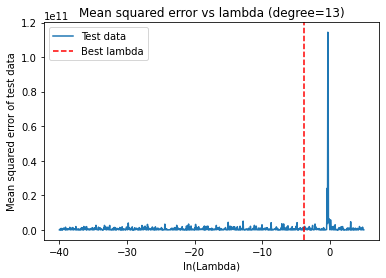

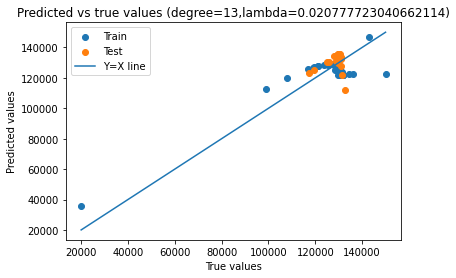

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the data
train_data=pd.read_csv('train35_dataset1.csv')
test_data=pd.read_csv('test35_dataset1.csv')
#Split the data into features and labels
X_train,y_train=train_data.iloc[:,0].values,train_data.iloc[:,2].values
X_test,y_test=test_data.iloc[:,0].values,test_data.iloc[:,2].values
#Set the degree of the polynomial
degree=13


#Create polynomial features for input variables
X_train_poly=np.column_stack((np.ones(X_train.shape[0]),X_train))
X_test_poly=np.column_stack((np.ones(X_test.shape[0]),X_test))
for d in range(2,degree+1):
    X_train_poly=np.column_stack((X_train_poly,X_train**d))
    X_test_poly=np.column_stack((X_test_poly,X_test**d))

#Define the range of lambda values to try here 
lamda_values=np.linspace(-40,5,1000)
#Initialize arrays to store MSE values
mse_train_values=np.zeros((len(lamda_values),5))
mse_val_values=np.zeros((len(lamda_values),5))
least_error_fold=0
least_mse=float('inf')
#Perform 5-fold cross-validation to select the best value of lambda
for i in range(5):
    #Split the training data into training and validation sets
    train_indices=np.arange(len(X_train_poly))
    val_indices=np.arange(i,len(X_train_poly),5)
    train_indices=np.delete(train_indices,val_indices)
    X_train_fold,y_train_fold=X_train_poly[train_indices],y_train[train_indices]
    X_val_fold,y_val_fold=X_train_poly[val_indices],y_train[val_indices]
    
    #Compute MSE for each value of lambda on the training and validation sets
    for j,lamda in enumerate(np.exp(lamda_values)):
        I=np.identity(X_train_fold.shape[1])
        #closed form
        beta=np.linalg.inv(X_train_fold.T@X_train_fold+lamda*I) @ X_train_fold.T@y_train_fold
        #print(lamda)
        y_train_pred=X_train_fold@beta
        y_val_pred=X_val_fold@beta
        mse_train_values[j,i]=np.mean((y_train_pred-y_train_fold)**2)
        mse_val_values[j,i]=np.mean((y_val_pred-y_val_fold)**2)
        if least_mse>np.mean((y_val_pred-y_val_fold)**2):
          least_error_fold=i
#Compute the average MSE across all folds for each value of lambda
mse_val_mean=mse_val_values.mean(axis=1)
mse_train_mean= mse_train_values.mean(axis= 1)
#Find the best value of lambda that minimizes the validation error
lmda_val=np.argmin(mse_val_mean)
best_lambda= (lamda_values[lmda_val])
print("Best Lambda value: ",np.exp(best_lambda))
train_indices= np.arange(len(X_train_poly))
val_indices= np.arange(least_error_fold,len(X_train_poly),5)
train_indices=np.delete(train_indices,val_indices)
#print(train_indices)
X_train_poly,y_train=X_train_poly[train_indices],y_train[train_indices]
#Train the model with the best value of lambda on the full training set
I=np.identity(X_train_poly.shape[1])
beta=np.linalg.inv(X_train_poly.T @ X_train_poly+best_lambda*I) @ X_train_poly.T @ y_train
#Compute the mean squared error on the training and test sets
y_train_pred=X_train_poly@beta
mse_train=np.mean((y_train_pred - y_train)**2)
y_test_pred=X_test_poly @ beta
mse_test=np.mean((y_test_pred - y_test)**2)
X_test_poly=np.column_stack((np.ones(X_test.shape[0]),X_test))
for d in range(2,degree+1):
    X_test_poly=np.column_stack((X_test_poly,X_test**d))
mse_test_range=[]
for l in lamda_values:
  beta=np.linalg.inv(X_train_poly.T @ X_train_poly+l*I) @ X_train_poly.T @ y_train
  y_test_pred=X_test_poly @ beta
  mse_test_range.append(np.mean((y_test_pred - y_test)**2))
#print(mse_test_range)
#Print the mean squared error on the training and test sets
print(f"Mean squared error on train set: {mse_train:.3f}")
print(f"Mean squared error on test set: {mse_test:.3f}")

#Plot the mean squared error as a function of lambda
#plt.plot((lamda_values),mse_train_mean,label='Train')
plt.plot((lamda_values),mse_test_range,label='Test data')
plt.axvline(x=best_lambda,color='r',linestyle='--',label='Best lambda')
plt.xlabel('ln(Lambda)')
plt.ylabel('Mean squared error of test data')
#plt.xscale('log')
plt.title(f'Mean squared error vs lambda (degree={degree})')
plt.legend()
plt.show()
#Plot the predicted values against the true values for the training and test sets
plt.scatter(y_train,y_train_pred,label='Train')
plt.scatter(y_test,y_test_pred,label='Test')
plt.plot([np.min(y_train),np.max(y_train)],[np.min(y_train),np.max(y_train)],label='Y=X line')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title(f'Predicted vs true values (degree={degree},lambda={np.exp(best_lambda)})')
plt.legend()
plt.show()



In [14]:
# Mean squared error on train set: 73113216.119
# Mean squared error on test set: 44612900.461
# error for the best model using Mean Square Error(MSE) for test data : 72619267.2972907
# error for the best model using Mean Square Error(MSE) for train data : 67459928.21291181